In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])

In [4]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [5]:
#Selecting key features for both dataframes:

bb100_keep = ['WeekID','SongID', 'Performer']

feat_keep = ['SongID','danceability', 'energy', 'speechiness', 'acousticness', 
             'instrumentalness', 'liveness', 'valence']

In [6]:
bb100_feat = pd.merge(bb100[bb100_keep], features[feat_keep], on='SongID', how='left')

In [7]:
bb100_feat

,WeekID,SongID,Performer,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,1965-07-17,Don't Just Stand TherePatty Duke,Patty Duke,0.574,0.256,0.0298,0.6100,0.000077,0.1000,0.568
1,1965-07-24,Don't Just Stand TherePatty Duke,Patty Duke,0.574,0.256,0.0298,0.6100,0.000077,0.1000,0.568
2,1965-07-31,Don't Just Stand TherePatty Duke,Patty Duke,0.574,0.256,0.0298,0.6100,0.000077,0.1000,0.568
3,1965-08-07,Don't Just Stand TherePatty Duke,Patty Duke,0.574,0.256,0.0298,0.6100,0.000077,0.1000,0.568
4,1965-08-14,Don't Just Stand TherePatty Duke,Patty Duke,0.574,0.256,0.0298,0.6100,0.000077,0.1000,0.568
...,...,...,...,...,...,...,...,...,...,...
330456,2018-10-20,God Is A WomanAriana Grande,Ariana Grande,0.602,0.658,0.0558,0.0233,0.000060,0.2370,0.268
330457,1977-05-21,I Wanna Get Next To YouRose Royce,Rose Royce,0.620,0.179,0.0314,0.8350,0.030000,0.0928,0.675
330458,1981-05-23,I Can't Stand ItEric Clapton And His Band,Eric Clapton And His Band,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330459,1973-09-29,Here I Am Come & Take MeAl Green,Al Green,0.815,0.388,0.0364,0.3180,0.000084,0.0673,0.846


In [8]:
ideal = bb100_feat.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean()
ideal

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
WeekID,,,,,,,
1958-12-31,0.545860,0.471431,0.051397,0.670536,0.062691,0.193292,0.675069
1959-12-31,0.528111,0.482844,0.057691,0.674084,0.070608,0.192840,0.661094
1960-12-31,0.516852,0.456821,0.045528,0.666800,0.070480,0.205267,0.653143
1961-12-31,0.531123,0.478718,0.052219,0.653479,0.087808,0.218387,0.666775
1962-12-31,0.542766,0.477447,0.057662,0.638669,0.071893,0.213591,0.670719
...,...,...,...,...,...,...,...
2017-12-31,0.682885,0.641847,0.116469,0.168601,0.004120,0.146380,0.503560
2018-12-31,0.687011,0.636133,0.125148,0.179402,0.003884,0.167008,0.454047
2019-12-31,0.693093,0.623126,0.125736,0.223738,0.007480,0.162145,0.499985


In [9]:
df = ideal.iloc[[-1]]
df

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
WeekID,,,,,,,
2021-12-31,0.651664,0.593304,0.107856,0.289071,0.00317,0.160534,0.498986


In [10]:
df.iloc[0]

danceability        0.651664
energy              0.593304
speechiness         0.107856
acousticness        0.289071
instrumentalness    0.003170
liveness            0.160534
valence             0.498986
Name: 2021-12-31 00:00:00, dtype: float64

In [11]:
values=df.iloc[0].values.flatten().tolist()
values

[0.6516641689373297,
 0.5933036103542234,
 0.10785572207084469,
 0.2890712683923706,
 0.003169610476839237,
 0.16053351498637602,
 0.4989859673024523]

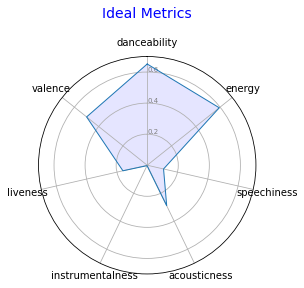

In [12]:
from math import pi
 
# number of variable
categories=list(df)[0:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=7)
plt.ylim(0,0.7)

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Ideal Metrics")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
#values=df.loc[1].drop('Group').values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="The Rest")
#ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
#plt.legend(loc='lower left', bbox_to_anchor=(0.9, 0.08))

# Show the graph
plt.title('Ideal Metrics', color='b', pad=20, fontsize=14)
plt.show()